In [155]:
%pylab inline
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
plt.style.use('ggplot');
import warnings
from itertools import product

Populating the interactive namespace from numpy and matplotlib


Загрузим общую таблицу агрегированных данных с января 2011 по июнь 2016

In [156]:
main_df = pd.read_csv('TAXI DATA/arg_data.csv', sep = ';')

In [157]:
# main_df.sort_values(by = 'date and time', axis = 0, inplace = True)
main_df.set_index('dt', inplace = True)

In [158]:
main_df.head()

,1,2,3,4,5,6,7,8,9,10,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
dt,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
main_df.tail()

,1,2,3,4,5,6,7,8,9,10,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
dt,,,,,,,,,,,,,,,,,,,,,
2016-05-31 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-31 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-31 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-31 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Подготовим выборку даннных: рассмотрим поездки из зоны 1230 (зона с Empire State Building), с января по май 2016.

In [160]:
data = main_df[(main_df.index<'2016-06') & (main_df.index>='2016-01')].iloc[:, 1229]

Обернем Series в DataFrame для дальнейшего STL разложения

In [161]:
data = pd.DataFrame(data)
data.columns = ['trips']

Визуализируем ряд

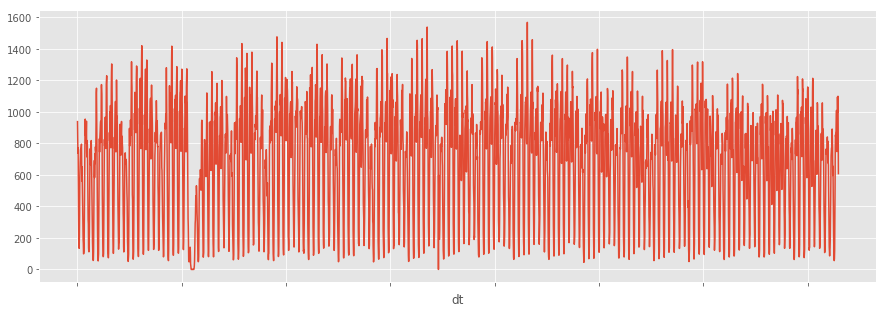

In [162]:
plt.figure(figsize = (15, 5))
data['trips'].plot()
# plt.plot(data.trips)
plt.show()


STL - декомпозиция ряда

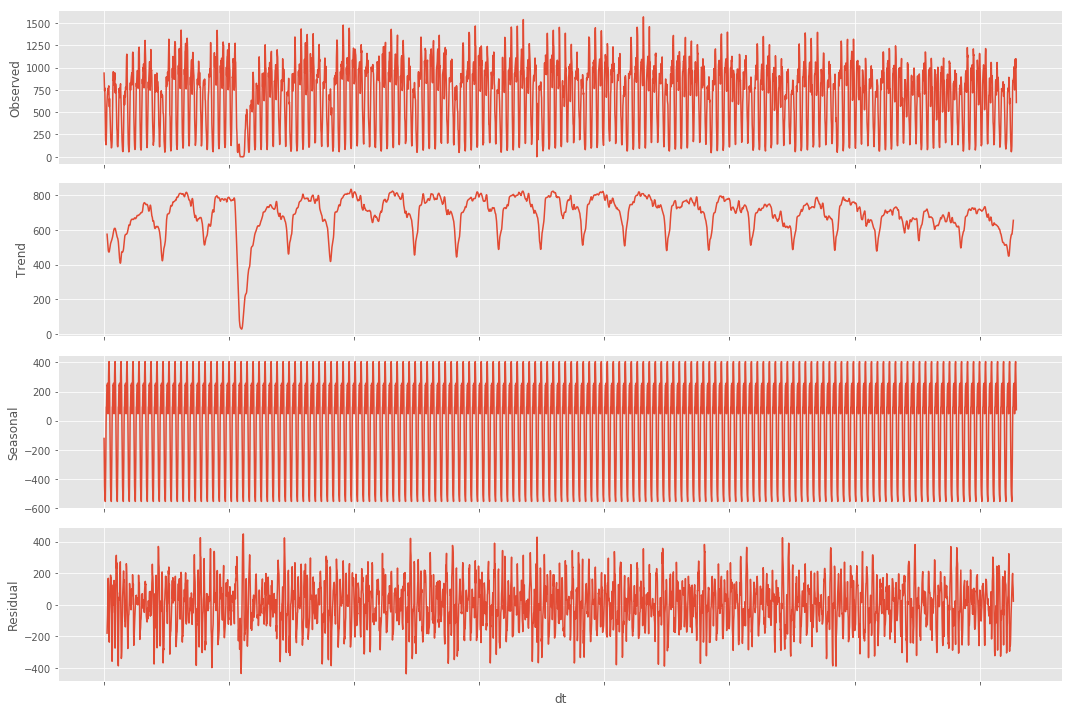

In [163]:
plt.figure(figsize(15, 10))
sm.tsa.seasonal_decompose(data['trips'], freq = 24).plot();

Аномалия минимума

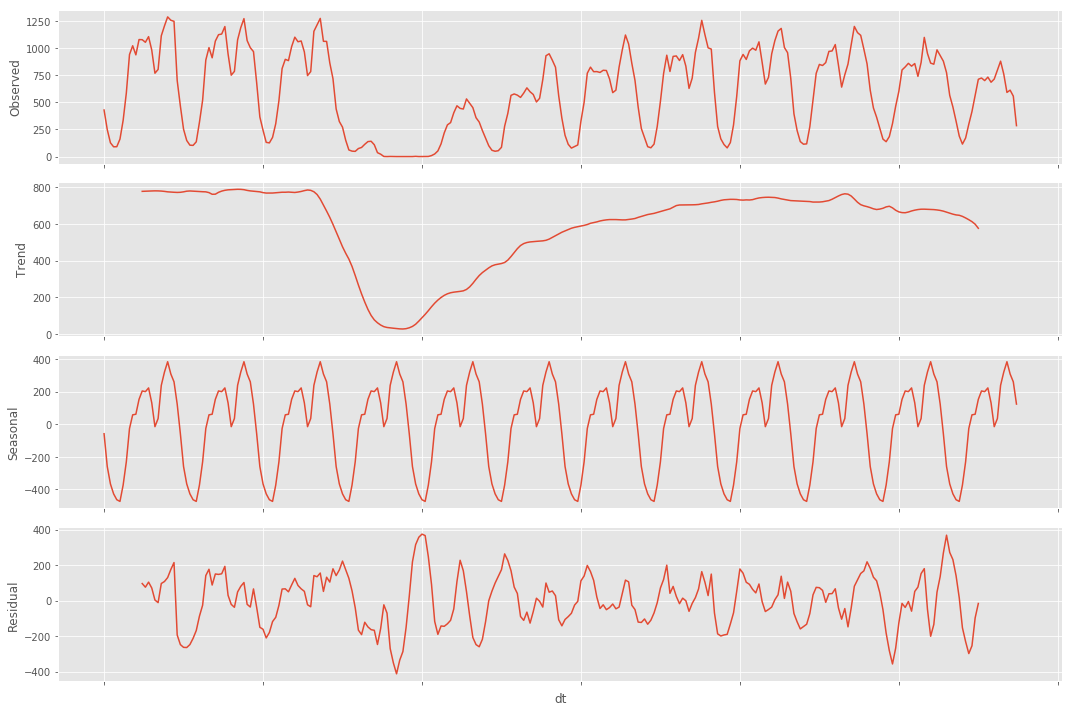

In [164]:
plt.figure(figsize(15, 10))
sm.tsa.seasonal_decompose(data.loc['2016-01-20':'2016-02-01'].dropna(), freq = 24).plot();

Виной аномалии послужил снежный шторм 5-ой категории 23-24 января 

https://en.wikipedia.org/wiki/January_2016_United_States_blizzard

Подберем примерный порядок дифференцирования в модели ARIMA. Для этого сделаем регрессию целового признака на построенные признаки.

Подготовим тригонометрическиепризнаки для учета недельной сезонности вида:
\begin{equation}
s\displaystyle _{i}=\sin([1,...,T]*2\pi i/168),  c\displaystyle _{i}=\cos([1,...,T]*2\pi i/168), i = 1,...,K
\end{equation}

Расмотрим остатки, варьируя гиперпараметр  K.

In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [166]:
mse_list = []
K = 100
for number in range (1, K+1):
    ols_data = data.copy()
    for i in range(1, number+1):        
        ols_data['s_'+str(i)] = np.sin(np.arange(1, data.shape[0]+1)*2*np.pi*i/168)
        ols_data['c_'+str(i)] = np.cos(np.arange(1, data.shape[0]+1)*2*np.pi*i/168)
    y = ols_data.trips
    X = ols_data.loc[:, 's_1':]
    model = LinearRegression()
    res = model.fit(X, y)
    mse_list.append(mean_squared_error(y, res.predict(X)))
    K_opt = np.argmin(mse_list)
print 'Минимальное квадратичное отклонение достигнуто при K =', K_opt


Минимальное квадратичное отклонение достигнуто при K = 99


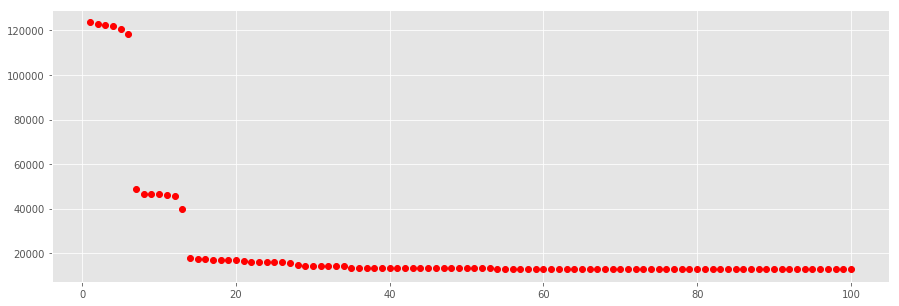

In [167]:
plt.figure(figsize(15, 5))
plt.plot(np.arange(1, K+1), mse_list, 'ro')

In [168]:
K_opt = 40

Сгенерируем оптимальный набор тригонометрических признаков

In [169]:
for i in range(1, K_opt+1):        
        data['s_'+str(i)] = np.sin(np.arange(1, data.shape[0]+1)*2*np.pi*i/168)
        data['c_'+str(i)] = np.cos(np.arange(1, data.shape[0]+1)*2*np.pi*i/168)

In [171]:
data.head(2)

,trips,s_1,c_1,s_2,c_2,s_3,c_3,s_4,c_4,s_5,...,s_36,c_36,s_37,c_37,s_38,c_38,s_39,c_39,s_40,c_40
dt,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,938.0,0.037391,0.999301,0.074730,0.997204,0.111964,0.993712,0.149042,0.988831,0.185912,...,0.974928,0.222521,0.982566,0.185912,0.988831,0.149042,0.993712,0.111964,0.997204,0.074730
2016-01-01 01:00:00,830.0,0.074730,0.997204,0.149042,0.988831,0.222521,0.974928,0.294755,0.955573,0.365341,...,0.433884,-0.900969,0.365341,-0.930874,0.294755,-0.955573,0.222521,-0.974928,0.149042,-0.988831


Построим модель линейной регресии по полученному набору признаков и оценим ее качество

In [172]:
y = ols_data.trips
X_opt = ols_data.loc[:, 's_1':]

model = LinearRegression()
res = model.fit(X_opt, y)
y_pred = res.predict(X_opt)

data['l_prediction'] = y_pred
data['error'] = y - y_pred


In [173]:
print 'Коэффициент детерминации модели:', res.score(X_opt, y)

Коэффициент детерминации модели: 0.9013353021063693


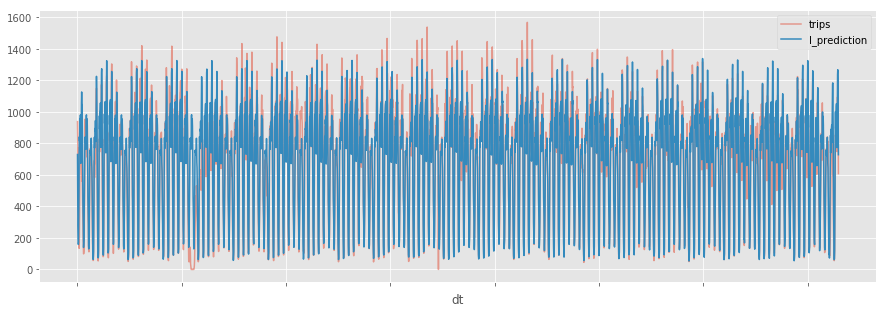

In [174]:
data['trips'].plot(alpha = 0.5, legend = True)
data['l_prediction'].plot(legend = True)

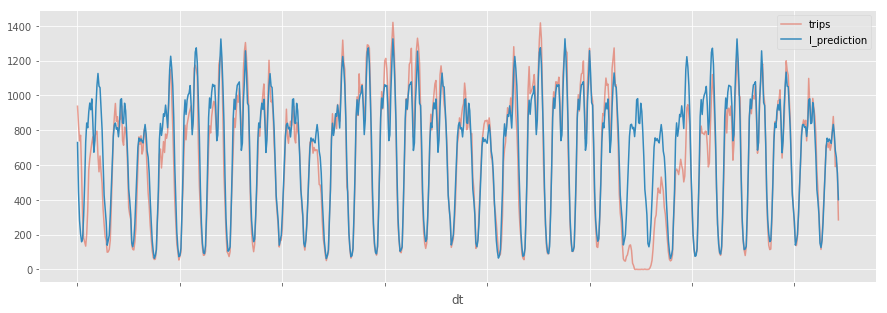

In [175]:
data.loc['2016-01':'2016-02','trips'].plot(alpha = 0.5, legend = True)
data.loc['2016-01':'2016-02','l_prediction'].plot(legend = True)

Декомпозиция остатков

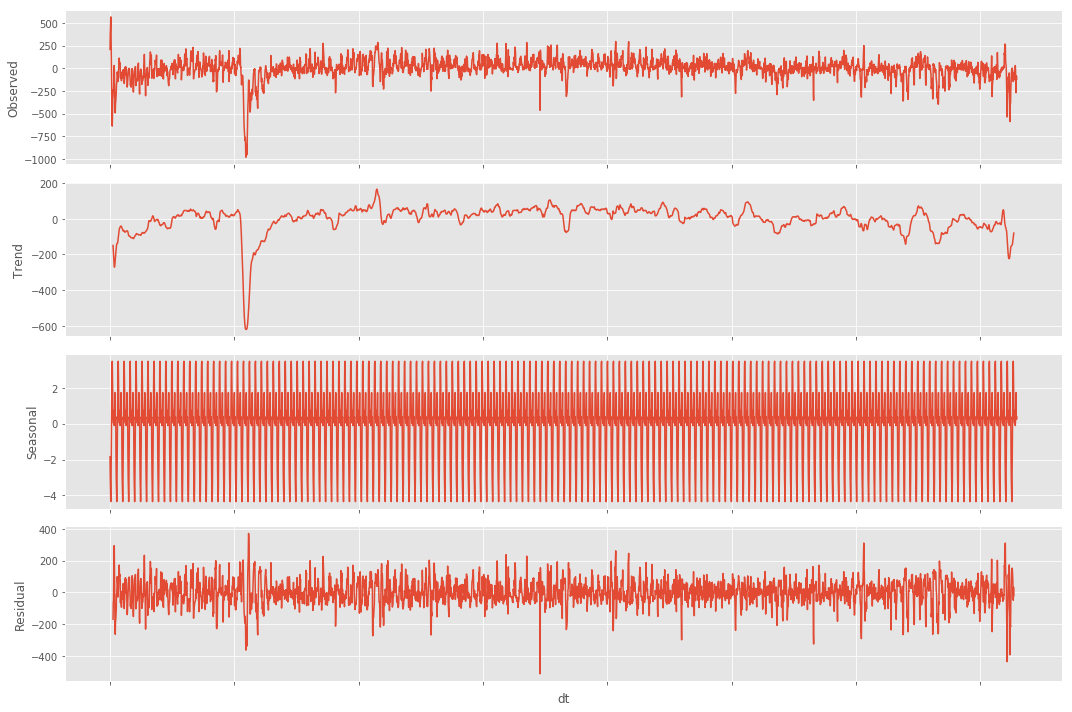

In [176]:
plt.figure(figsize(15, 10))
sm.tsa.seasonal_decompose(data['error'], freq = 24).plot();

In [177]:
data.head()

,trips,s_1,c_1,s_2,c_2,s_3,c_3,s_4,c_4,s_5,...,s_37,c_37,s_38,c_38,s_39,c_39,s_40,c_40,l_prediction,error
dt,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,938.0,0.037391,0.999301,0.074730,0.997204,0.111964,0.993712,0.149042,0.988831,0.185912,...,0.982566,0.185912,0.988831,0.149042,0.993712,0.111964,0.997204,0.074730,729.355338,208.644662
2016-01-01 01:00:00,830.0,0.074730,0.997204,0.149042,0.988831,0.222521,0.974928,0.294755,0.955573,0.365341,...,0.365341,-0.930874,0.294755,-0.955573,0.222521,-0.974928,0.149042,-0.988831,445.352813,384.647187
2016-01-01 02:00:00,739.0,0.111964,0.993712,0.222521,0.974928,0.330279,0.943883,0.433884,0.900969,0.532032,...,-0.846724,-0.532032,-0.900969,-0.433884,-0.943883,-0.330279,-0.974928,-0.222521,281.924874,457.075126
2016-01-01 03:00:00,771.0,0.149042,0.988831,0.294755,0.955573,0.433884,0.900969,0.563320,0.826239,0.680173,...,-0.680173,0.733052,-0.563320,0.826239,-0.433884,0.900969,-0.294755,0.955573,204.009278,566.990722
2016-01-01 04:00:00,560.0,0.185912,0.982566,0.365341,0.930874,0.532032,0.846724,0.680173,0.733052,0.804598,...,0.593820,0.804598,0.733052,0.680173,0.846724,0.532032,0.930874,0.365341,158.884145,401.115855


In [150]:
print 'Значение критерия Дики-Фуллера для исходного ряда:', sm.tsa.stattools.adfuller(data['trips'])[1]

Значение критерия Дики-Фуллера для исходного ряда: 1.4746102923764004e-10


Критерий нам говорит, что гипотезу нестационарности можно отвергнуть. Кроме того, экспериментально было выявлено, что диференцирование ухудшает качество решения модели ARIMA при доступных вычислительных мощностях.



Будем считать ряд стационарным. Рассмотрим его полную и частичную автокорреляцию, подберем гиперпараметры ARIMA

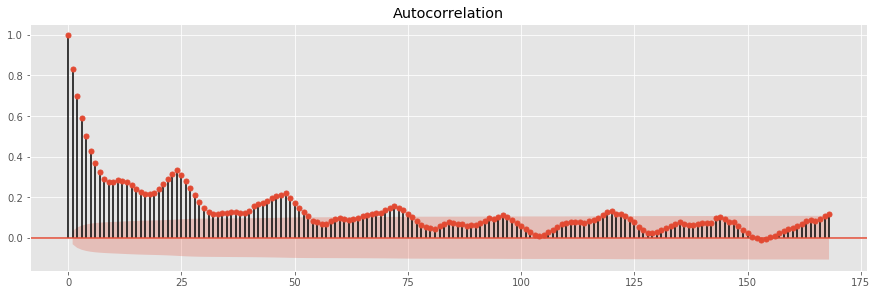

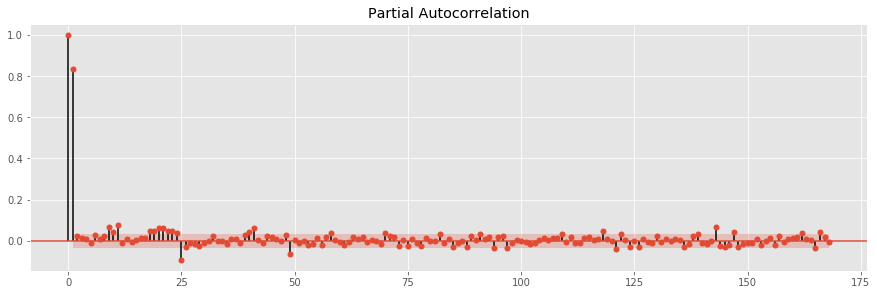

In [178]:
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(data['error'].dropna().values.squeeze(), lags = 168, ax = ax)
plt.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(data['error'].dropna().values.squeeze(), lags = 168, ax = ax)
plt.show()

Выбранные значения параметров:
Q = 1
q = 3
P = 1
p = 4

In [179]:
ps = range(0, 5)
d = 0
qs = range(0, 4)
Ps = range(0, 2)
D = 0
Qs = range(0, 2)

In [180]:
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)

len(parameters_list)

80

In [183]:
%%time
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore') #отключим предупрежедения, так как не все модели, которые мы получим в процессе перебора, 
                                  #будут сходящимися
for param in parameters_list:     
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model=sm.tsa.statespace.SARIMAX(data.trips, 
                                        exog = data[data.columns[1:-2]], order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('wrong parameters:', param)
        continue

    except LinAlgError:
        print('singularity parameters:', param)
        continue

    aic = model.aic
    print 'parameters:{} have aic value {}'.format(param, aic)
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
warnings.filterwarnings('default')

parameters:(0, 0, 0, 0) have aic value 58320.8446702
parameters:(0, 0, 0, 1) have aic value 54831.9140653
parameters:(0, 0, 1, 0) have aic value 46398.626251
parameters:(0, 0, 1, 1) have aic value 44740.2408979
parameters:(0, 1, 0, 0) have aic value 53818.7662426
parameters:(0, 1, 0, 1) have aic value 50983.8115702
parameters:(0, 1, 1, 0) have aic value 46908.1858366
parameters:(0, 1, 1, 1) have aic value 42757.2462064
parameters:(0, 2, 0, 0) have aic value 50649.4730614
parameters:(0, 2, 0, 1) have aic value 49030.7049714
parameters:(0, 2, 1, 0) have aic value 44332.3886157
parameters:(0, 2, 1, 1) have aic value 49599.7936556
parameters:(0, 3, 0, 0) have aic value 48940.6731999
parameters:(0, 3, 0, 1) have aic value 52076.5758915
parameters:(0, 3, 1, 0) have aic value 43991.3338252
parameters:(0, 3, 1, 1) have aic value 41874.5318717
parameters:(1, 0, 0, 0) have aic value 42237.695087
parameters:(1, 0, 0, 1) have aic value 42222.3675678
parameters:(1, 0, 1, 0) have aic value 42211.325

In [184]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

      parameters           aic
62  (4, 0, 1, 1)  41364.062718
50  (3, 1, 1, 1)  41376.014720
46  (3, 0, 1, 1)  41392.725225
66  (4, 1, 1, 1)  41396.251137
42  (2, 3, 1, 1)  41410.686148


In [185]:
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              trips   No. Observations:                 3648
Model:             SARIMAX(4, 0, 0)x(1, 0, 1, 12)   Log Likelihood              -20595.031
Date:                            Wed, 09 Jan 2019   AIC                          41364.063
Time:                                    19:41:00   BIC                          41903.631
Sample:                                01-01-2016   HQIC                         41556.223
                                     - 05-31-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
s_1          -60.0046     10.852     -5.529      0.000     -81.274     -38.735
c_1           54.5961     11.612   

Проверим остатки модели на наличие актокоррелированности и смещенности 

Критерий Стьюдента: p=0.087540
Критерий Дики-Фуллера: p=0.000000


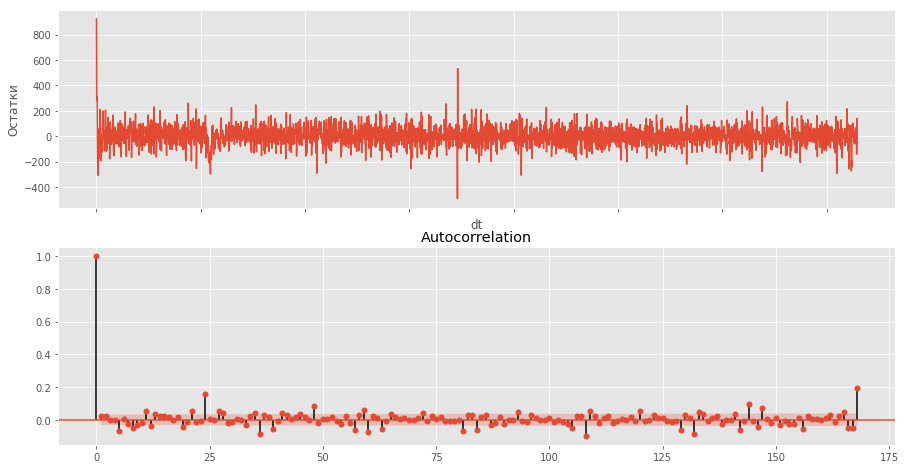

In [188]:
plt.figure(figsize(15,8))
plt.subplot(211)
best_model.resid.plot()
plt.ylabel(u'Остатки')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid.values.squeeze(), lags=168, ax=ax)

print("Критерий Стьюдента: p=%f" % stats.ttest_1samp(best_model.resid, 0)[1])
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(best_model.resid)[1])

Критерий Дики-Фуллера позволяет отклонить гипотезу о наличии автокоррелированности в остатках. Критерий Стьюдента не позволяет считать модель несмещенной. Скорректируем смещенность модели с помощью средненего значения остатков.

In [189]:
mean_resid = np.abs(best_model.resid.values.mean())
print mean_resid

2.000581444718089


Критерий Стьюдента: p=0.000638
Критерий Дики-Фуллера: p=0.000000


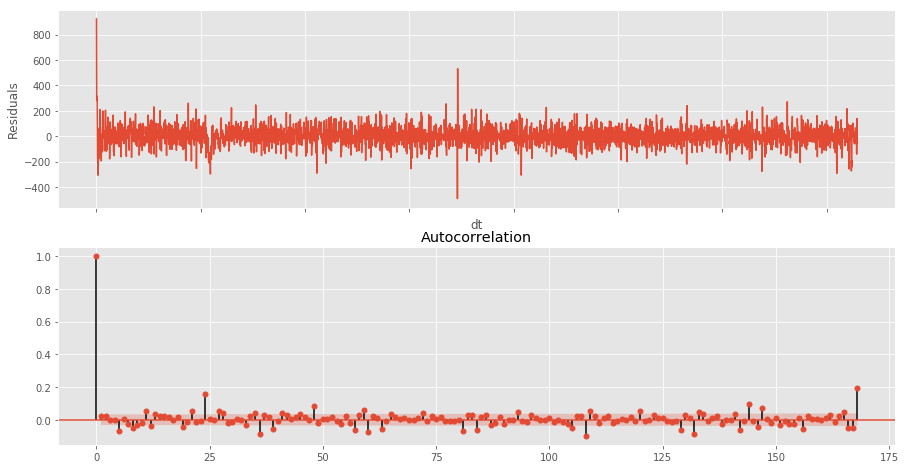

In [202]:
plt.figure(figsize(15,8))
plt.subplot(211)
best_model.resid.plot()
plt.ylabel(u'Residuals')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid.values.squeeze() + mean_resid , lags=168, ax=ax)

print("Критерий Стьюдента: p=%f" % stats.ttest_1samp(best_model.resid + mean_resid , 0)[1])
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(best_model.resid + mean_resid)[1])

Критерии Стьюдента и Дики-Фуллера выполнены

Итоговая модель

In [203]:
data['model'] = best_model.fittedvalues + mean_resid

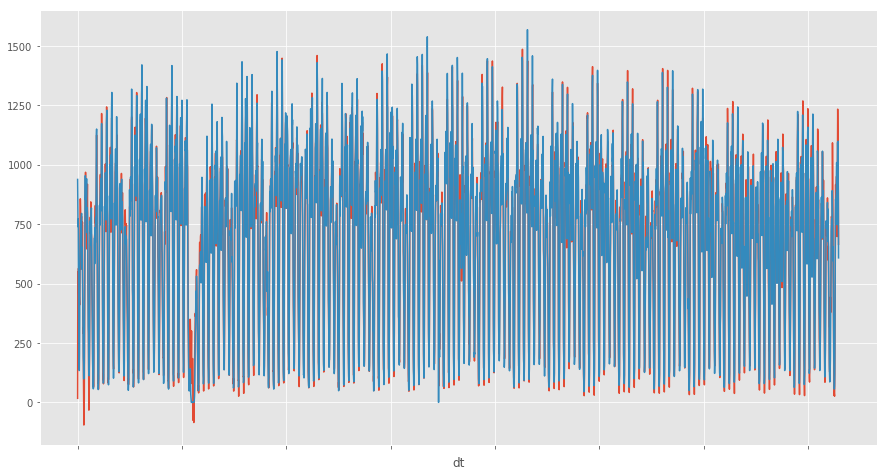

In [204]:
data['model'].plot()
data['trips'].plot()

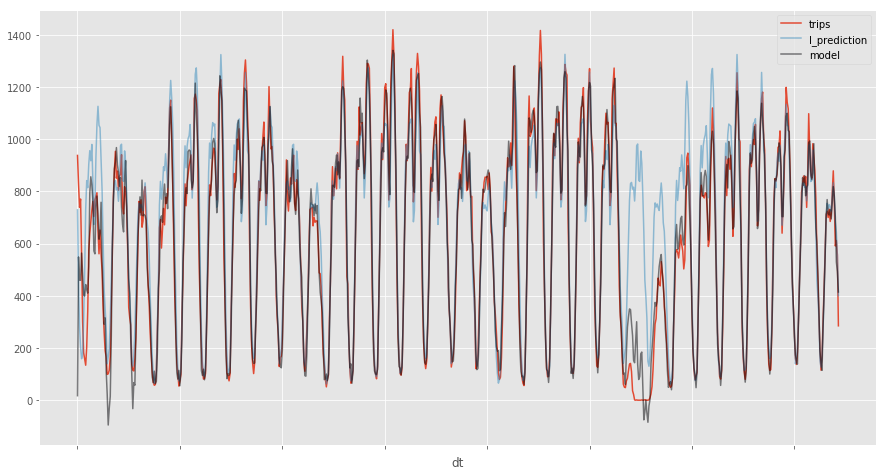

In [205]:
data.loc['2016-01':'2016-02','trips'].plot(legend = True)
data.loc['2016-01':'2016-02','l_prediction'].plot(legend = True, alpha = 0.5)
data.loc['2016-01':'2016-02','model'].plot(legend = True, alpha = 0.5, colormap = 'magma')

Модель досаточно точно предсказывает данные, исключением является аномальные осадки в январе. Однако, такое явление единичным.